In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

/Users/noahgift/.aibookenv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
attendance_df = pd.read_csv("../data/nba_2017_attendance.csv");attendance_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680
1,Dallas Mavericks,41,103,0.811366,0.019789
2,Sacramento Kings,41,101,0.721928,0.017608
3,Miami Heat,41,100,0.805400,0.019643
4,Toronto Raptors,41,100,0.813050,0.019830


In [3]:
endorsement_df = pd.read_csv("../data/nba_2017_endorsements.csv");endorsement_df.head()

,NAME,TEAM,SALARY_MILLIONS,ENDORSEMENT_MILLIONS
0,LeBron James,Cleveland Cavaliers,31,55
1,Kevin Durant,Golden State Warriors,27,36
2,Stephen Curry,Golden State Warriors,12,35
3,James Harden,Houston Rockets,27,20
4,Russell Westbrook,Oklahoma City Thunder,27,15


In [4]:
valuations_df = pd.read_csv("../data/nba_2017_team_valuations.csv");valuations_df.head()

,TEAM,VALUE_MILLIONS
0,New York Knicks,3300.0
1,Los Angeles Lakers,3000.0
2,Golden State Warriors,2600.0
3,Chicago Bulls,2500.0
4,Boston Celtics,2200.0


In [5]:
salary_df = pd.read_csv("../data/nba_2017_salary.csv");salary_df.head()

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


In [6]:
pie_df = pd.read_csv("../data/nba_2017_pie.csv");pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [7]:
plus_minus_df = pd.read_csv("../data/nba_2017_real_plus_minus.csv");plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


In [8]:
br_stats_df = pd.read_csv("../data/nba_2017_br.csv");br_stats_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


In [9]:
elo_df = pd.read_csv("../data/nba_2017_elo.csv");elo_df.head()

,ELO,TEAM,CONF
0,1770,Golden State Warriors,West
1,1661,San Antonio Spurs,West
2,1636,Los Angeles Clippers,West
3,1617,Utah Jazz,West
4,1602,Houston Rockets,West


In [10]:
attendance_valuation_df = attendance_df.merge(valuations_df, how="inner", on="TEAM")

In [11]:
attendance_valuation_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680,2500.0
1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0
2,Sacramento Kings,41,101,0.721928,0.017608,1075.0
3,Miami Heat,41,100,0.805400,0.019643,1350.0
4,Toronto Raptors,41,100,0.813050,0.019830,1125.0


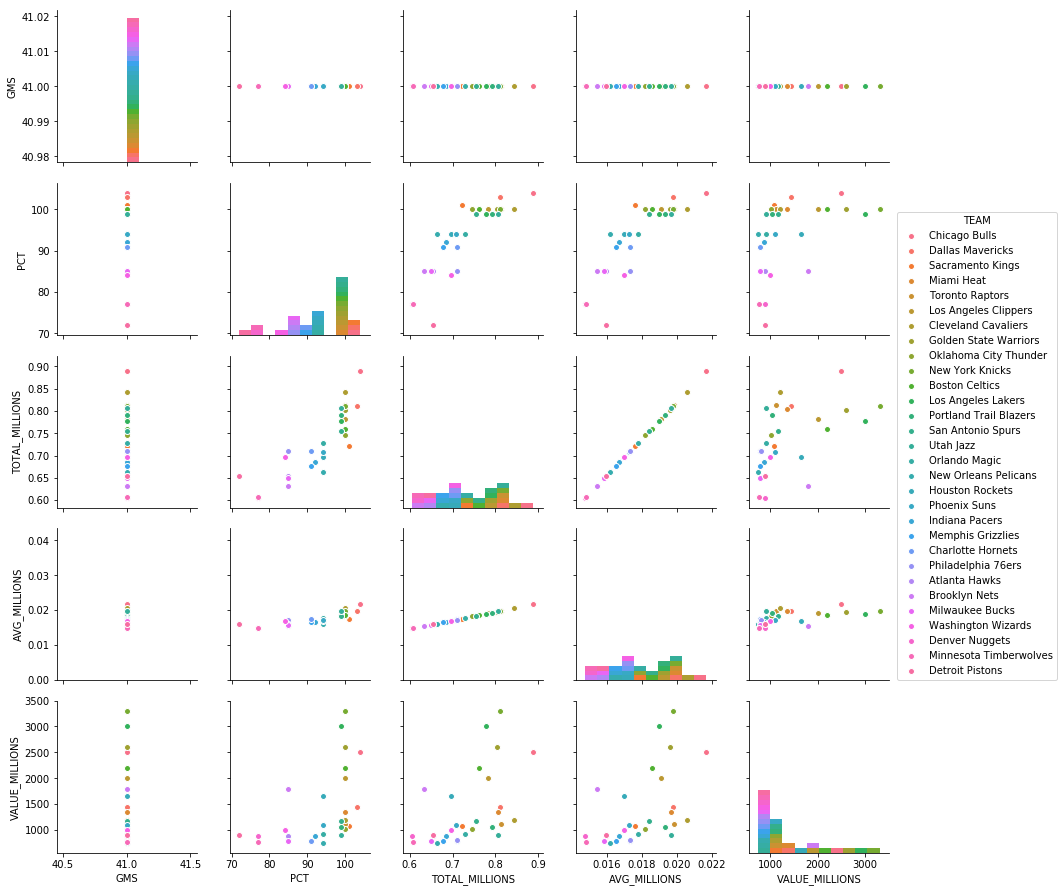

In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"));sns.pairplot(attendance_valuation_df, hue="TEAM")

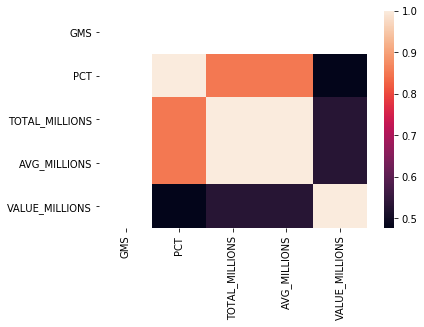

In [13]:
corr = attendance_valuation_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [14]:
attendance_valuation_df.to_csv("../data/nba_2017_att_val.csv")

In [15]:
valuations = attendance_valuation_df.pivot("TEAM", "AVG_MILLIONS", "VALUE_MILLIONS")

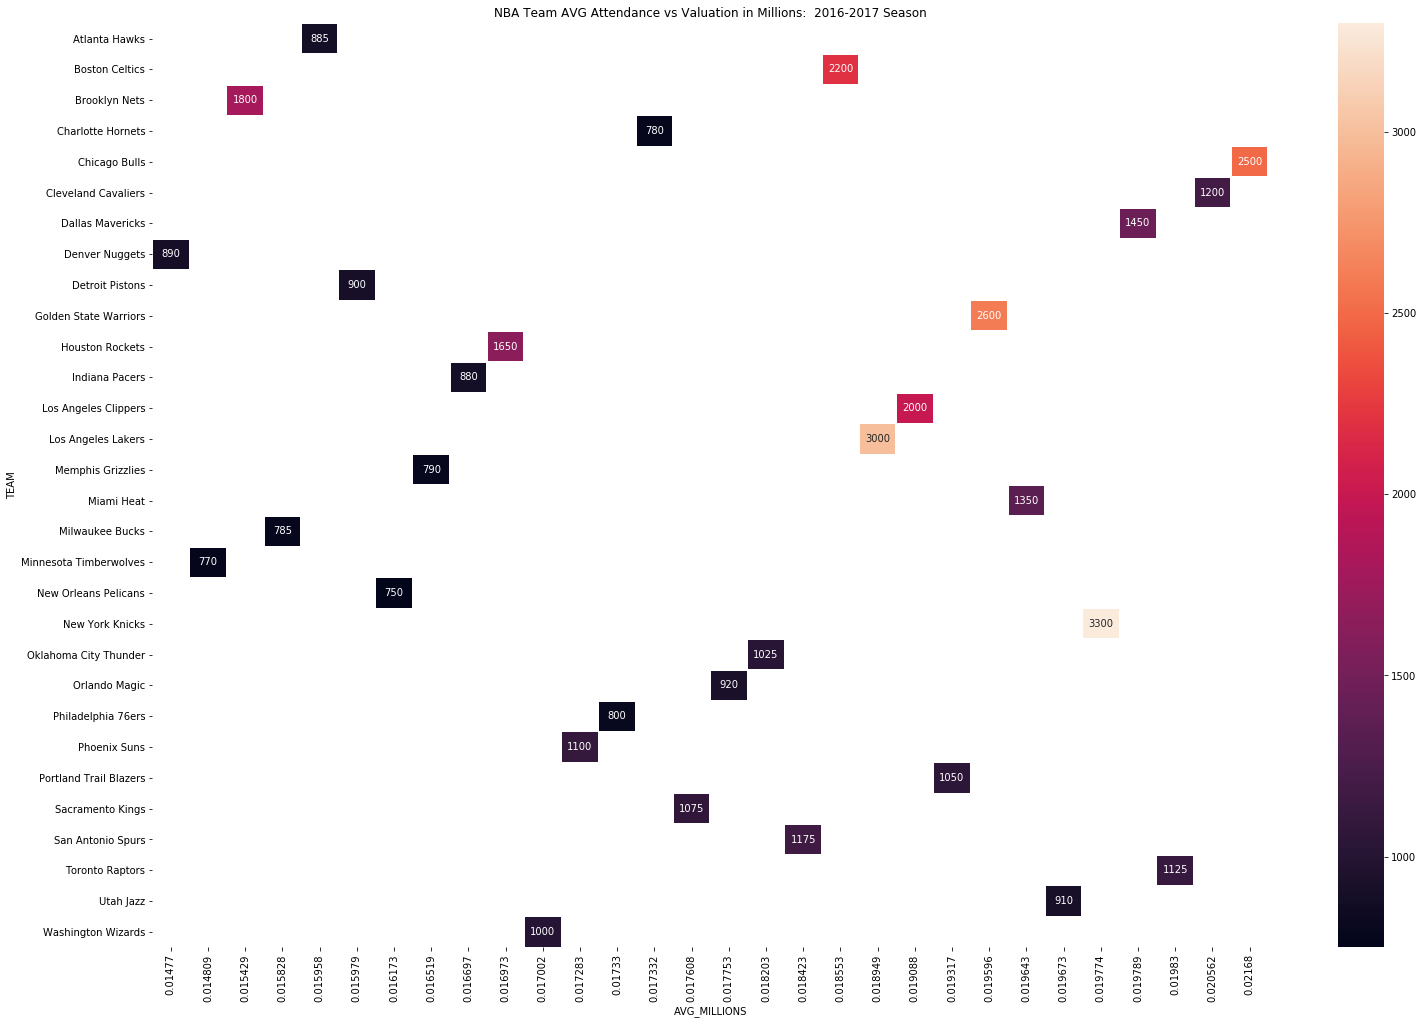

In [16]:
plt.subplots(figsize=(25,17))
ax = plt.axes()
ax.set_title("NBA Team AVG Attendance vs Valuation in Millions:  2016-2017 Season")
sns.heatmap(valuations,linewidths=.5, annot=True, fmt='g')

In [17]:
results = smf.ols('VALUE_MILLIONS ~AVG_MILLIONS', data=attendance_valuation_df).fit()

In [18]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VALUE_MILLIONS   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     10.98
Date:                Thu, 24 Aug 2017   Prob (F-statistic):            0.00255
Time:                        10:00:14   Log-Likelihood:                -234.04
No. Observations:                  30   AIC:                             472.1
Df Residuals:                      28   BIC:                             474.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2408.0155   1141.235     -2.110   

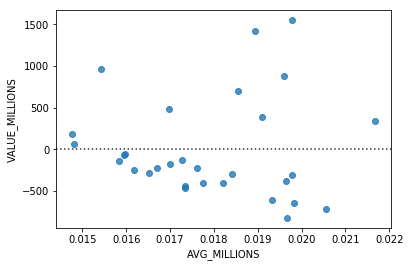

In [19]:
sns.residplot(y="VALUE_MILLIONS", x="AVG_MILLIONS", data=attendance_valuation_df)

In [20]:
attendance_valuation_elo_df = attendance_valuation_df.merge(elo_df, how="inner", on="TEAM")

In [21]:
attendance_valuation_elo_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,CONF
0,Chicago Bulls,41,104,0.888882,0.021680,2500.0,1519,East
1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0,1420,West
2,Sacramento Kings,41,101,0.721928,0.017608,1075.0,1393,West
3,Miami Heat,41,100,0.805400,0.019643,1350.0,1569,East
4,Toronto Raptors,41,100,0.813050,0.019830,1125.0,1600,East


In [22]:
attendance_valuation_elo_df.to_csv("../data/nba_2017_att_val_elo.csv")

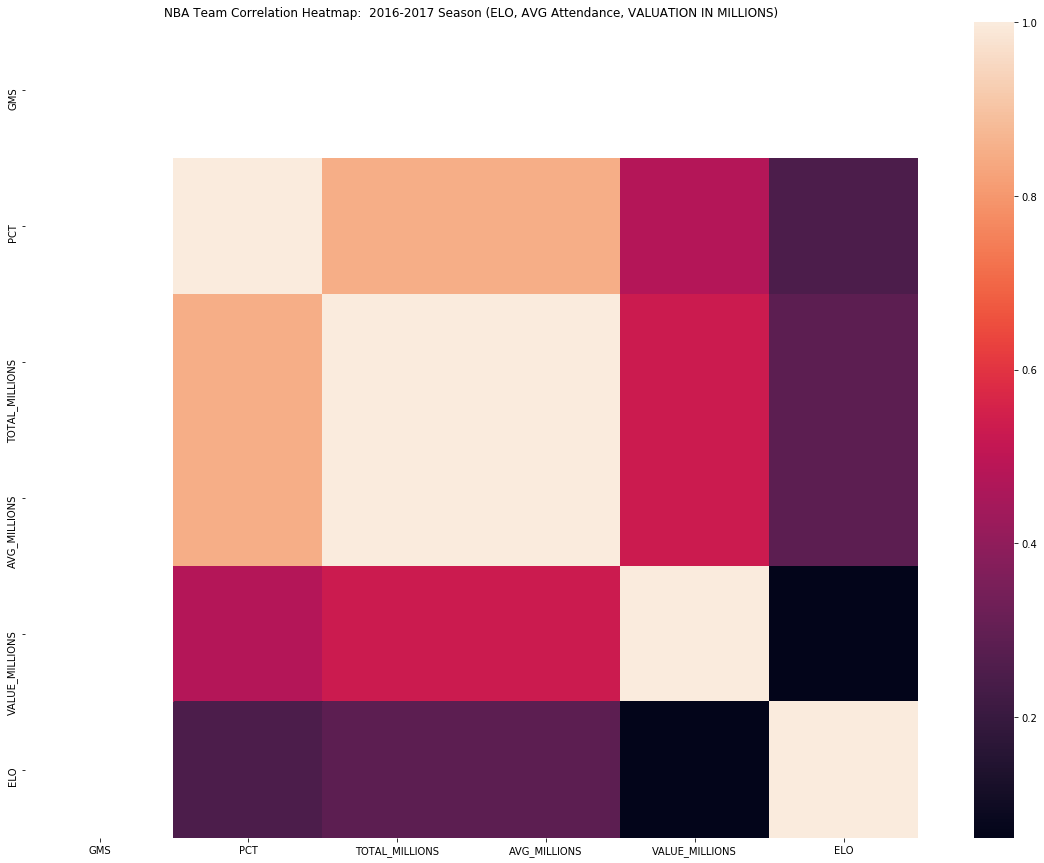

In [23]:
corr_elo = attendance_valuation_elo_df.corr()
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Team Correlation Heatmap:  2016-2017 Season (ELO, AVG Attendance, VALUATION IN MILLIONS)")
sns.heatmap(corr_elo, 
            xticklabels=corr_elo.columns.values,
            yticklabels=corr_elo.columns.values)

In [24]:
corr_elo

,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO
GMS,NaN,NaN,NaN,NaN,NaN,NaN
PCT,NaN,1.000000,0.850839,0.85085,0.476644,0.251144
TOTAL_MILLIONS,NaN,0.850839,1.000000,1.00000,0.530697,0.285907
AVG_MILLIONS,NaN,0.850850,1.000000,1.00000,0.530730,0.285930
VALUE_MILLIONS,NaN,0.476644,0.530697,0.53073,1.000000,0.060575
ELO,NaN,0.251144,0.285907,0.28593,0.060575,1.000000


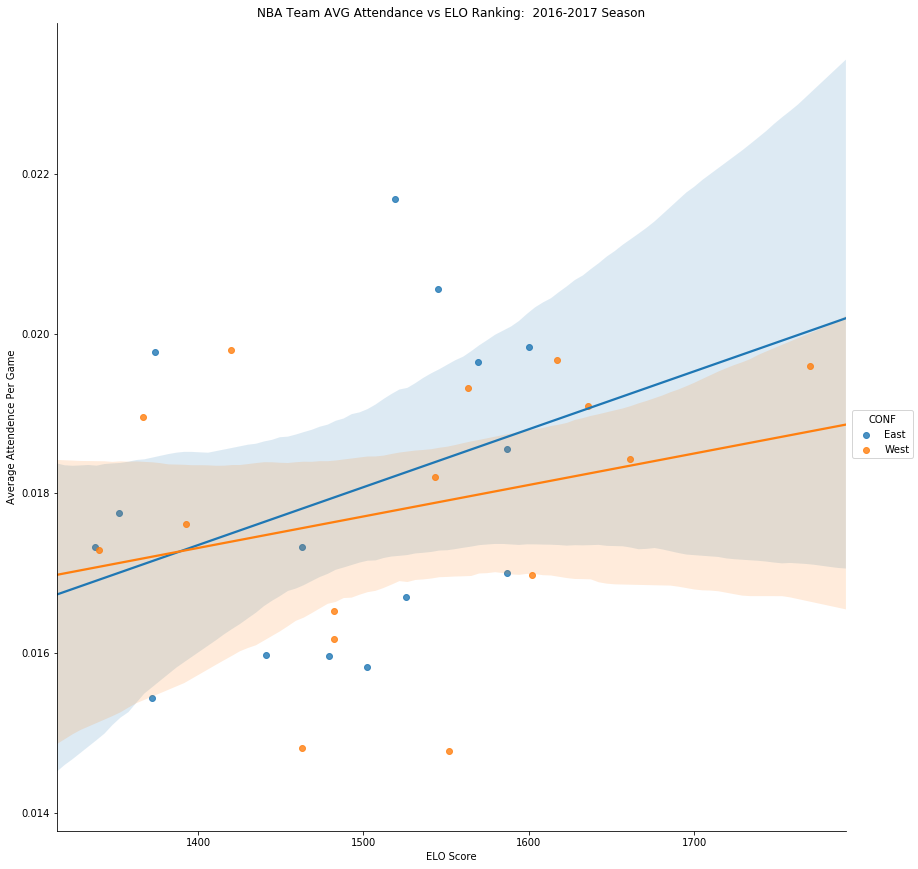

In [25]:
ax = sns.lmplot(x="ELO", y="AVG_MILLIONS", data=attendance_valuation_elo_df, hue="CONF", size=12)
ax.set(xlabel='ELO Score', ylabel='Average Attendence Per Game', title="NBA Team AVG Attendance vs ELO Ranking:  2016-2017 Season")

In [26]:
attendance_valuation_elo_df.groupby("CONF")["ELO"].median()


CONF
East    1502
West    1543
Name: ELO, dtype: int64

In [27]:
attendance_valuation_elo_df.groupby("CONF")["AVG_MILLIONS"].median()

CONF
East    0.017332
West    0.018203
Name: AVG_MILLIONS, dtype: float64

In [28]:
results = smf.ols('AVG_MILLIONS ~ELO', data=attendance_valuation_elo_df).fit()

In [29]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AVG_MILLIONS   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.493
Date:                Thu, 24 Aug 2017   Prob (F-statistic):              0.126
Time:                        10:00:16   Log-Likelihood:                 148.99
No. Observations:                  30   AIC:                            -294.0
Df Residuals:                      28   BIC:                            -291.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0107      0.005      2.333      0.0

In [30]:
from sklearn.cluster import KMeans

In [31]:
k_means = KMeans(n_clusters=3)

In [32]:
cluster_source = attendance_valuation_elo_df.loc[:,["AVG_MILLIONS", "ELO", "VALUE_MILLIONS"]]

In [33]:
kmeans = k_means.fit(cluster_source)

In [34]:
attendance_valuation_elo_df['cluster'] = kmeans.labels_

In [35]:
attendance_valuation_elo_df.to_csv("../data/nba_2017_att_val_elo_with_cluster.csv")

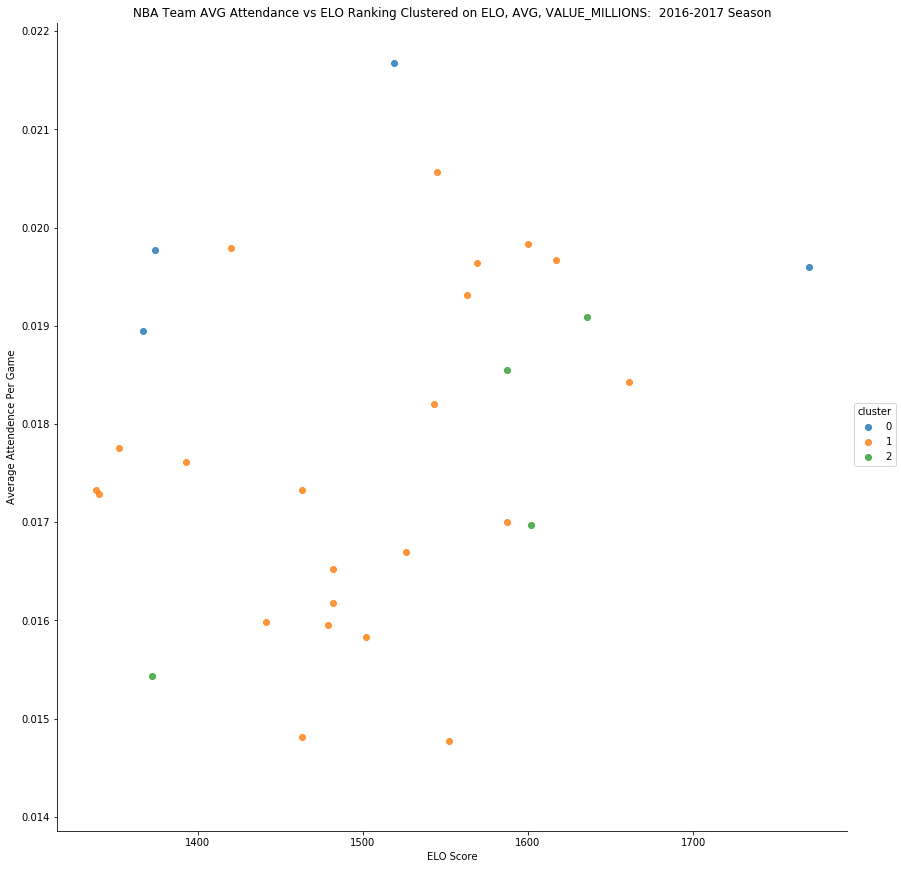

In [36]:
ax = sns.lmplot(x="ELO", y="AVG_MILLIONS", data=attendance_valuation_elo_df,hue="cluster", size=12, fit_reg=False)
ax.set(xlabel='ELO Score', ylabel='Average Attendence Per Game', title="NBA Team AVG Attendance vs ELO Ranking Clustered on ELO, AVG, VALUE_MILLIONS:  2016-2017 Season")

In [37]:
kmeans.__dict__

{'algorithm': 'auto',
 'cluster_centers_': array([[  1.99997500e-02,   1.50750000e+03,   2.85000000e+03],
        [  1.75673182e-02,   1.49627273e+03,   9.82272727e+02],
        [  1.75107500e-02,   1.54925000e+03,   1.91250000e+03]]),
 'copy_x': True,
 'inertia_': 1684829.477344949,
 'init': 'k-means++',
 'labels_': array([0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1], dtype=int32),
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_iter_': 2,
 'n_jobs': 1,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [38]:
kmeans.cluster_centers_

array([[  1.99997500e-02,   1.50750000e+03,   2.85000000e+03],
       [  1.75673182e-02,   1.49627273e+03,   9.82272727e+02],
       [  1.75107500e-02,   1.54925000e+03,   1.91250000e+03]])

In [39]:
cluster_1 = attendance_valuation_elo_df["cluster"] == 1

In [40]:
attendance_valuation_elo_df[cluster_1]

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,CONF,cluster
1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0,1420,West,1
2,Sacramento Kings,41,101,0.721928,0.017608,1075.0,1393,West,1
3,Miami Heat,41,100,0.805400,0.019643,1350.0,1569,East,1
4,Toronto Raptors,41,100,0.813050,0.019830,1125.0,1600,East,1
6,Cleveland Cavaliers,41,100,0.843042,0.020562,1200.0,1545,East,1
8,Oklahoma City Thunder,41,100,0.746323,0.018203,1025.0,1543,West,1
12,Portland Trail Blazers,41,99,0.792029,0.019317,1050.0,1563,West,1
13,San Antonio Spurs,41,99,0.755347,0.018423,1175.0,1661,West,1
14,Utah Jazz,41,99,0.806605,0.019673,910.0,1617,West,1
15,Orlando Magic,41,94,0.727875,0.017753,920.0,1352,East,1
